### Import Libraries and Data:

In [76]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

We will import our data in a pandas dataframe form:

In [77]:
df = pd.read_csv("C:/Users/Sotiris/Desktop/XE_Real_Estate_Sample_Data_S.-_1.csv (1)/XE Real Estate Sample Data - 1.csv", engine="python", encoding = "utf-8-sig")

#### Now we inspect our dataframe:

In [78]:
print(df.shape)
df.columns

(5787, 40)


Index(['ADVID', 'CUSTOMERID', 'ΗΜΕΡΟΜΗΝΙΑ', 'MAXPUBDATE', 'ISACTIVE',
       'NUMBEROFPHOTOS', 'THETRXTYPE', 'ΤΥΠΟΣΠΕΛΑΤΗ', 'ΕΙΔΟΣ', 'ΥΠΟΕΙΔΟΣ',
       'ΤΥΠΟΣ', 'ΤΙΜΗ', 'ΤΙΜΗΣΥΖΗΤΗΣΙΜΗ', 'ΕΜΒΑΔΟΝ', 'ΟΡΙΟΘΕΤΗΣΗ',
       'ΈΤΟΣΚΑΤΑΣΚΕΥΗΣ', 'ΈΤΟΣΑΝΑΚΑΙΝΙΣΗΣ', 'ΚΑΤΑΣΤΑΣΗ', 'ΌΡΟΦΟΣ',
       'ΥΠΝΟΔΩΜΑΤΙΑ', 'ΜΠΑΝΙΑ', 'WC', 'ΤΖΑΚΙ', 'ΠΑΡΚΙΝΓΚ', 'ΗΛΙΑΚΟΣ',
       'ΚΛΙΜΑΤΙΣΜΟΣ', 'ΚΗΠΟΣ', 'ΕΜΒΑΔΟΝΚΗΠΟΥ', 'ΑΠΟΘΗΚΗ', 'ΕΜΒΑΔΟΝΑΠΟΘΗΚΗΣ',
       'ΕΜΒΑΔΟΝΗΜΙΥΠΑΙΘΡΙΩΝ', 'ΧΩΡΙΣΑΣΑΝΣΕΡ', 'ΧΩΡΙΣΚΟΙΝΟΧΡΗΣΤΑ', 'ΠΙΣΙΝΑ',
       'ΠΟΡΤΑΑΣΦΑΛΕΙΑΣ', 'ΤΕΝΤΕΣ', 'ΘΕΡΜΑΝΣΗ', 'ΦΥΣΙΚΟΑΕΡΙΟ',
       'ΠΡΟΣΑΝΑΤΟΛΙΣΜΟΣ', 'ΘΕΑ'],
      dtype='object')

In [79]:
df.dtypes

ADVID                   int64
CUSTOMERID              int64
ΗΜΕΡΟΜΗΝΙΑ             object
MAXPUBDATE             object
ISACTIVE                int64
NUMBEROFPHOTOS          int64
THETRXTYPE             object
ΤΥΠΟΣΠΕΛΑΤΗ            object
ΕΙΔΟΣ                  object
ΥΠΟΕΙΔΟΣ               object
ΤΥΠΟΣ                  object
ΤΙΜΗ                   object
ΤΙΜΗΣΥΖΗΤΗΣΙΜΗ         object
ΕΜΒΑΔΟΝ                object
ΟΡΙΟΘΕΤΗΣΗ             object
ΈΤΟΣΚΑΤΑΣΚΕΥΗΣ         object
ΈΤΟΣΑΝΑΚΑΙΝΙΣΗΣ        object
ΚΑΤΑΣΤΑΣΗ              object
ΌΡΟΦΟΣ                 object
ΥΠΝΟΔΩΜΑΤΙΑ            object
ΜΠΑΝΙΑ                 object
WC                     object
ΤΖΑΚΙ                  object
ΠΑΡΚΙΝΓΚ               object
ΗΛΙΑΚΟΣ                object
ΚΛΙΜΑΤΙΣΜΟΣ            object
ΚΗΠΟΣ                  object
ΕΜΒΑΔΟΝΚΗΠΟΥ           object
ΑΠΟΘΗΚΗ                object
ΕΜΒΑΔΟΝΑΠΟΘΗΚΗΣ        object
ΕΜΒΑΔΟΝΗΜΙΥΠΑΙΘΡΙΩΝ    object
ΧΩΡΙΣΑΣΑΝΣΕΡ           object
ΧΩΡΙΣΚΟΙΝΟΧΡΗΣΤΑ       object
ΠΙΣΙΝΑ    

In [80]:
df.head()

,ADVID,CUSTOMERID,ΗΜΕΡΟΜΗΝΙΑ,MAXPUBDATE,ISACTIVE,NUMBEROFPHOTOS,THETRXTYPE,ΤΥΠΟΣΠΕΛΑΤΗ,ΕΙΔΟΣ,ΥΠΟΕΙΔΟΣ,...,ΕΜΒΑΔΟΝΗΜΙΥΠΑΙΘΡΙΩΝ,ΧΩΡΙΣΑΣΑΝΣΕΡ,ΧΩΡΙΣΚΟΙΝΟΧΡΗΣΤΑ,ΠΙΣΙΝΑ,ΠΟΡΤΑΑΣΦΑΛΕΙΑΣ,ΤΕΝΤΕΣ,ΘΕΡΜΑΝΣΗ,ΦΥΣΙΚΟΑΕΡΙΟ,ΠΡΟΣΑΝΑΤΟΛΙΣΜΟΣ,ΘΕΑ
0,434634862,1794126,2018-11-11,20181115 0756,0,0,Rent,Cat1,διαμέρισμα,(null),...,(null),όχι,όχι,όχι,όχι,όχι,-,όχι,(null),(null)
1,535176046,1794126,2018-11-11,20181115 0755,0,0,Rent,Cat1,διαμέρισμα,(null),...,(null),όχι,όχι,όχι,όχι,όχι,-,όχι,(null),(null)
2,928170734,1559408,2018-11-09,20181110 1756,0,0,Rent,Cat1,διαμέρισμα,γκαρσονιέρα,...,(null),όχι,όχι,όχι,όχι,όχι,-,όχι,προσόψεως,(null)
3,764731854,0,2018-11-13,20190116 1800,1,0,Rent,Cat1,διαμέρισμα,(null),...,(null),όχι,όχι,όχι,ναι,όχι,-,όχι,(null),(null)
4,824786670,974940,2018-11-11,20181118 1627,1,0,Rent,Cat1,διαμέρισμα,οροφοδιαμέρισμα,...,(null),όχι,όχι,όχι,όχι,όχι,-,όχι,(null),(null)


## 1. Unique real estate listings: "What percentage of our dataset can be considered unique?"

Fisrt of all, it is clear that ADVID should be a unique character. Indeed:

In [81]:
df["ADVID"].unique().shape[0] == df.shape[0]

True

We will computate the number of rows that have same values and diifferent ADVID:

In [82]:
df[df.duplicated(subset=df.columns[1:40])].shape[0]

11

We can see that the number is too small based on the dataset and that is because the definition of "unique" based on having all the same values is extreme. We will define "unique" better below:

Let's focus on CUSTOMERID which is probably determined uniquely by a sign in process in your site. Below we computate the duplicated values based on CUSTOMERID:

In [83]:
df[df.duplicated(subset="CUSTOMERID",keep="first")].shape[0]

5374

So we got 5787-5374=413 only unique CUSTOMERIDS! This can be also confirmed below:

In [73]:
df["CUSTOMERID"].unique().shape[0]

413

We notice that the percentage of unique customer in the dataset is 7.1% but the percetage of the unique customer in the active dataset is:

In [84]:
100*df[df["ISACTIVE"]==1]["CUSTOMERID"].unique().shape[0]/df[df["ISACTIVE"]==1].shape[0]

21.388667198723066

Now we will make an exploration in the values of our dataset. This this will be our guide to choose the most suitable columns to define "unique" content.

In [85]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print("")

ADVID
767999046    1
616539890    1
445021598    1
633232098    1
397748838    1
584004342    1
127072998    1
367594262    1
143874794    1
372865134    1
300415726    1
412563682    1
996997134    1
665762078    1
345185010    1
814021598    1
649452278    1
754713294    1
216306554    1
772660914    1
687979258    1
304463974    1
624286430    1
747821886    1
344321206    1
879845958    1
725927654    1
965491394    1
220535494    1
29904570     1
            ..
554266566    1
454257750    1
735413650    1
70542538     1
644152466    1
810149270    1
712394730    1
371084110    1
482134086    1
441902462    1
363799918    1
990682726    1
208847106    1
929776998    1
45284766     1
444029038    1
749790570    1
305376366    1
321898302    1
164671182    1
296034326    1
549774766    1
30697950     1
964855358    1
833430902    1
53570054     1
125480626    1
27481950     1
601105786    1
590084430    1
Name: ADVID, Length: 5787, dtype: int64

CUSTOMERID
20493      1482
400885     

Price is one of the most significant variables and same advertisments should have the similar price. Therefore we need a grouping of price.

 Create a new price column:

In [86]:
df["New_Price"]=np.nan

Below we change the column "ΤΙΜΗ" values into float:

In [87]:
for i in range(0,df.shape[0]):
    df.iloc[i,11]=df.iloc[i,11].replace(",","")
    if df.iloc[i,11]=="(null)":
        df.iloc[i,11]=0
    
df["ΤΙΜΗ"]=df["ΤΙΜΗ"].astype(float)
df[["ΤΙΜΗ"]].dtypes

ΤΙΜΗ    float64
dtype: object

As we can imagine THETRXTYPE plays a big role in ΤΙΜΗ:

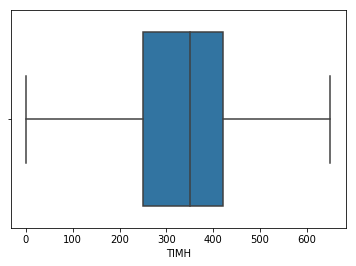

In [88]:
sns.boxplot(df[df["THETRXTYPE"]=="Rent"]["ΤΙΜΗ"],showfliers=False)

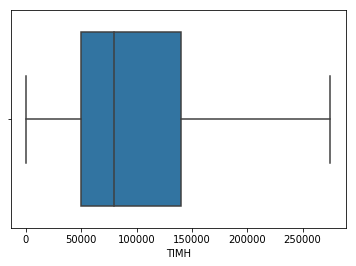

In [89]:
sns.boxplot(df[df["THETRXTYPE"]=="Sell"]["ΤΙΜΗ"],showfliers=False)

### Modeling:

This code below will help as create the New_Price column:

In [90]:
a=[5000.0]
for i in range(1,500):
    a.append(a[i-1]+3000)

b=[10.0]
for i in range(1,500):
    b.append(b[i-1]+10)


for i in range(0,df.shape[0]):
    if df.iloc[i,6]=="Sell":
        for j in range(0,len(a)):
            if df.iloc[i,11]<a[j]:
                df.iloc[i,40]=a[j]
                break
    elif df.iloc[i,6]=="Rent":
        for j in range(0,len(b)):
            if df.iloc[i,11]<b[j]:
                df.iloc[i,40]=b[j]
                break

In [91]:
df[df["THETRXTYPE"]=="Sell"][["ΤΙΜΗ","New_Price"]].head()

,ΤΙΜΗ,New_Price
1212,220000.0,221000.0
1213,185000.0,188000.0
1214,70000.0,71000.0
1215,105000.0,107000.0
1216,130000.0,131000.0


In [92]:
df[df["THETRXTYPE"]=="Rent"][["ΤΙΜΗ","New_Price"]].head()

,ΤΙΜΗ,New_Price
0,320.0,330.0
1,250.0,260.0
2,300.0,310.0
3,0.0,10.0
4,300.0,310.0


It is time to define our subset of columns based on which the unique content will be determined:

In [93]:
sbset1 = ["New_Price", "ΕΙΔΟΣ","ΈΤΟΣΚΑΤΑΣΚΕΥΗΣ", "ΚΑΤΑΣΤΑΣΗ", "ΤΖΑΚΙ", "ΠΑΡΚΙΝΓΚ", "ΗΛΙΑΚΟΣ", "ΚΗΠΟΣ", "ΟΡΙΟΘΕΤΗΣΗ", "ΑΠΟΘΗΚΗ", "ΦΥΣΙΚΟΑΕΡΙΟ", "ΚΛΙΜΑΤΙΣΜΟΣ", 
         "ΧΩΡΙΣΑΣΑΝΣΕΡ","ΧΩΡΙΣΚΟΙΝΟΧΡΗΣΤΑ", "ΠΙΣΙΝΑ", "ΠΟΡΤΑΑΣΦΑΛΕΙΑΣ" ,"ΤΕΝΤΕΣ"]
sbset2 = ["CUSTOMERID", "New_Price", "ΕΙΔΟΣ","ΈΤΟΣΚΑΤΑΣΚΕΥΗΣ", "ΚΑΤΑΣΤΑΣΗ", "ΤΖΑΚΙ", "ΠΑΡΚΙΝΓΚ", "ΗΛΙΑΚΟΣ", "ΚΗΠΟΣ", "ΟΡΙΟΘΕΤΗΣΗ", "ΑΠΟΘΗΚΗ", "ΦΥΣΙΚΟΑΕΡΙΟ", "ΚΛΙΜΑΤΙΣΜΟΣ", 
         "ΧΩΡΙΣΑΣΑΝΣΕΡ","ΧΩΡΙΣΚΟΙΝΟΧΡΗΣΤΑ", "ΠΙΣΙΝΑ", "ΠΟΡΤΑΑΣΦΑΛΕΙΑΣ" ,"ΤΕΝΤΕΣ"]

In [94]:
xr=df[df["THETRXTYPE"]=="Rent"].shape[0]
yr1=df[df["THETRXTYPE"]=="Rent"][df.duplicated(subset=sbset1,keep="first")].shape[0]
yr2=df[df["THETRXTYPE"]=="Rent"][df.duplicated(subset=sbset2,keep="first")].shape[0]
xs=df[df["THETRXTYPE"]=="Sell"].shape[0]
ys1=df[df["THETRXTYPE"]=="Sell"][df.duplicated(subset=sbset1,keep="first")].shape[0]
ys2=df[df["THETRXTYPE"]=="Sell"][df.duplicated(subset=sbset2,keep="first")].shape[0]

C:\Users\Sotiris\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Sotiris\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sotiris\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\Sotiris\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


### Results:

So the percentage of the unique "for rent" content from multiple entities is:

In [95]:
(xr-yr1)/xr

0.7863036303630363

And the percentage of the unique "for Sale" content from multiple entities is:

In [96]:
(xs-ys1)/xs

0.4483060109289618

The percentage of the unique "for Rent" content from a single entity is:

In [97]:
(xr-yr2)/xr

0.8201320132013201

And the percentage of the unique "for Sale" content from multiple entity is:

In [98]:
(xs-ys2)/xs

0.46994535519125685

## 2. Clustering based on publication duration:

In my opinion the hard part of this question is to create a publication duration column using your given dataframe. If this is done, then grouping is easy.

We define publicaton duration the distance between the starting date(ΗΜΕΡΟΜΗΝΙΑ) and {MAXUPDATE if ISACTIVE is 0 or from today if ISACTIVE is 1}: This definition does not take into account that listings which are not really new but are actually recreation of previous ones (as mentioned in the previous exercise) should ideally not skew the final result. In order to do that another definition and more work is required.

In [99]:
df["Starting_date"]=np.nan
df["End_date"]=np.nan

for i in range(0,df.shape[0]):
    
    y1=int(df.iloc[i,2][0:4])
    
    if int(df.iloc[i,2][5:6])==0:
        m1=int(df.iloc[i,2][6:7])
    else:
        m1=int(df.iloc[i,2][5:7])
    
    if int(df.iloc[i,2][8:9])==0:
        d1=int(df.iloc[i,2][9:10])
    else:
        d1=int(df.iloc[i,2][8:10])
    
    if df.iloc[i,3][0:4]=="(nul":
        y2=y1
        m2=m1
        d2=d1
    else:
        y2=int(df.iloc[i,3][0:4])
        
        if df.iloc[i,3][4:5]==0: 
            m2=int(df.iloc[i,3][5:6])
        else:
            m2=int(df.iloc[i,3][4:6])
        
        if int(df.iloc[i,3][6:7])==0:
            d2=int(df.iloc[i,3][7:8])
        else:
            d2=int(df.iloc[i,3][6:8])
        
    df.iloc[i,41]= date(y1, m1, d1)
    if df.iloc[i,4]==1:
        df.iloc[i,42]= date.today()
    else:
        df.iloc[i,42]= date(y2, m2, d2)

We have created a distance column in our dataframe that counts publication duration as defined above.

In [100]:
df["distance"]=np.nan
df["distance"]=df["End_date"]-df["Starting_date"]
df.head(18)

,ADVID,CUSTOMERID,ΗΜΕΡΟΜΗΝΙΑ,MAXPUBDATE,ISACTIVE,NUMBEROFPHOTOS,THETRXTYPE,ΤΥΠΟΣΠΕΛΑΤΗ,ΕΙΔΟΣ,ΥΠΟΕΙΔΟΣ,...,ΠΟΡΤΑΑΣΦΑΛΕΙΑΣ,ΤΕΝΤΕΣ,ΘΕΡΜΑΝΣΗ,ΦΥΣΙΚΟΑΕΡΙΟ,ΠΡΟΣΑΝΑΤΟΛΙΣΜΟΣ,ΘΕΑ,New_Price,Starting_date,End_date,distance
0,434634862,1794126,2018-11-11,20181115 0756,0,0,Rent,Cat1,διαμέρισμα,(null),...,όχι,όχι,-,όχι,(null),(null),330.0,2018-11-11,2018-11-15,4 days
1,535176046,1794126,2018-11-11,20181115 0755,0,0,Rent,Cat1,διαμέρισμα,(null),...,όχι,όχι,-,όχι,(null),(null),260.0,2018-11-11,2018-11-15,4 days
2,928170734,1559408,2018-11-09,20181110 1756,0,0,Rent,Cat1,διαμέρισμα,γκαρσονιέρα,...,όχι,όχι,-,όχι,προσόψεως,(null),310.0,2018-11-09,2018-11-10,1 days
3,764731854,0,2018-11-13,20190116 1800,1,0,Rent,Cat1,διαμέρισμα,(null),...,ναι,όχι,-,όχι,(null),(null),10.0,2018-11-13,2019-07-24,253 days
4,824786670,974940,2018-11-11,20181118 1627,1,0,Rent,Cat1,διαμέρισμα,οροφοδιαμέρισμα,...,όχι,όχι,-,όχι,(null),(null),310.0,2018-11-11,2019-07-24,255 days
5,437230270,71242,2018-11-13,20181120 1311,1,0,Rent,Cat2,διαμέρισμα,(null),...,όχι,όχι,-,όχι,"προσόψεως, διαμπερές",(null),330.0,2018-11-13,2019-07-24,253 days
6,286727422,1699559,2018-11-14,20190715 0942,1,10,Rent,Cat2,μεζονέτα,(null),...,ναι,όχι,-,όχι,"προσόψεως, διαμπερές, γωνιακό",(null),1210.0,2018-11-14,2019-07-24,252 days
7,866345086,185270,2018-11-14,20181207 1948,0,0,Rent,Cat2,διαμέρισμα,(null),...,ναι,όχι,-,ναι,"προσόψεως, διαμπερές",(null),440.0,2018-11-14,2018-12-07,23 days
8,570960974,166513,2018-11-09,20181120 1024,0,0,Rent,Cat2,διαμέρισμα,(null),...,ναι,ναι,-,όχι,προσόψεως,(null),460.0,2018-11-09,2018-11-20,11 days
9,4834334,1536948,2018-11-14,20181122 0840,0,0,Rent,Cat2,διαμέρισμα,(null),...,όχι,ναι,-,όχι,"προσόψεως, διαμπερές",(null),460.0,2018-11-14,2018-11-22,8 days


Now we will cluster our dataset based in publication duration into 5 clusters:

In [102]:
X=df[["distance"]].values
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

C:\Users\Sotiris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype timedelta64[ns] was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.76636118],
       [-0.76636118],
       [-0.78526439],
       [ 0.80260512],
       [ 0.81520726]])

In [103]:
X = KMeans(n_clusters=5, random_state=0).fit(X)

In [104]:
df["cluster"]=X.labels_

We can see that each cluster has listings with similar publication duration:

In [105]:
df[df["cluster"]==0].head()

,ADVID,CUSTOMERID,ΗΜΕΡΟΜΗΝΙΑ,MAXPUBDATE,ISACTIVE,NUMBEROFPHOTOS,THETRXTYPE,ΤΥΠΟΣΠΕΛΑΤΗ,ΕΙΔΟΣ,ΥΠΟΕΙΔΟΣ,...,ΤΕΝΤΕΣ,ΘΕΡΜΑΝΣΗ,ΦΥΣΙΚΟΑΕΡΙΟ,ΠΡΟΣΑΝΑΤΟΛΙΣΜΟΣ,ΘΕΑ,New_Price,Starting_date,End_date,distance,cluster
17,963705518,185270,2018-11-13,20190510 1702,0,0,Rent,Cat2,διαμέρισμα,(null),...,όχι,-,όχι,"προσόψεως, διαμπερές, γωνιακό",(null),510.0,2018-11-13,2019-05-10,178 days,0
22,448463854,1277233,2018-11-09,20190216 1436,0,0,Rent,Cat2,διαμέρισμα,(null),...,όχι,-,όχι,"διαμπερές, προσόψεως",(null),610.0,2018-11-09,2019-02-16,99 days,0
32,940825646,209711,2018-11-12,20190207 1549,0,0,Rent,Cat2,διαμέρισμα,(null),...,όχι,-,όχι,διαμπερές,(null),610.0,2018-11-12,2019-02-07,87 days,0
33,688849166,1699559,2018-03-04,20180604 1417,0,0,Rent,Cat2,διαμέρισμα,(null),...,ναι,-,ναι,προσόψεως,(null),430.0,2018-03-04,2018-06-04,92 days,0
57,465464542,1699559,2018-03-23,20180604 1417,0,0,Rent,Cat2,διαμέρισμα,(null),...,ναι,-,ναι,προσόψεως,(null),410.0,2018-03-23,2018-06-04,73 days,0


In [106]:
df[df["cluster"]==1].head()

,ADVID,CUSTOMERID,ΗΜΕΡΟΜΗΝΙΑ,MAXPUBDATE,ISACTIVE,NUMBEROFPHOTOS,THETRXTYPE,ΤΥΠΟΣΠΕΛΑΤΗ,ΕΙΔΟΣ,ΥΠΟΕΙΔΟΣ,...,ΤΕΝΤΕΣ,ΘΕΡΜΑΝΣΗ,ΦΥΣΙΚΟΑΕΡΙΟ,ΠΡΟΣΑΝΑΤΟΛΙΣΜΟΣ,ΘΕΑ,New_Price,Starting_date,End_date,distance,cluster
50,778355958,0,2018-03-05,20180509 1800,1,0,Rent,Cat1,διαμέρισμα,γκαρσονιέρα,...,όχι,-,όχι,(null),(null),10.0,2018-03-05,2019-07-24,506 days,1
51,580085814,0,2018-03-05,20180509 1800,1,0,Rent,Cat1,διαμέρισμα,(null),...,ναι,-,όχι,(null),(null),560.0,2018-03-05,2019-07-24,506 days,1
52,704605174,0,2018-03-05,20180509 1800,1,0,Rent,Cat1,διαμέρισμα,(null),...,όχι,-,όχι,εσωτερικό,(null),250.0,2018-03-05,2019-07-24,506 days,1
58,745467710,1699559,2018-03-23,20181002 1459,1,7,Rent,Cat2,διαμέρισμα,(null),...,ναι,-,ναι,προσόψεως,(null),430.0,2018-03-23,2019-07-24,488 days,1
59,576665022,231561,2018-03-23,20180522 2203,1,0,Rent,Cat1,διαμέρισμα,(null),...,ναι,-,όχι,προσόψεως,απεριόριστη θέα,360.0,2018-03-23,2019-07-24,488 days,1


In [72]:
df[df["cluster"]==2].head()

,ADVID,CUSTOMERID,ΗΜΕΡΟΜΗΝΙΑ,MAXPUBDATE,ISACTIVE,NUMBEROFPHOTOS,THETRXTYPE,ΤΥΠΟΣΠΕΛΑΤΗ,ΕΙΔΟΣ,ΥΠΟΕΙΔΟΣ,...,ΤΕΝΤΕΣ,ΘΕΡΜΑΝΣΗ,ΦΥΣΙΚΟΑΕΡΙΟ,ΠΡΟΣΑΝΑΤΟΛΙΣΜΟΣ,ΘΕΑ,New_Price,Starting_date,End_date,distance,cluster
0,434634862,1794126,2018-11-11,20181115 0756,0,0,Rent,Cat1,διαμέρισμα,(null),...,όχι,-,όχι,(null),(null),330.0,2018-11-11,2018-11-15,4,2
1,535176046,1794126,2018-11-11,20181115 0755,0,0,Rent,Cat1,διαμέρισμα,(null),...,όχι,-,όχι,(null),(null),260.0,2018-11-11,2018-11-15,4,2
2,928170734,1559408,2018-11-09,20181110 1756,0,0,Rent,Cat1,διαμέρισμα,γκαρσονιέρα,...,όχι,-,όχι,προσόψεως,(null),310.0,2018-11-09,2018-11-10,1,2
7,866345086,185270,2018-11-14,20181207 1948,0,0,Rent,Cat2,διαμέρισμα,(null),...,όχι,-,ναι,"προσόψεως, διαμπερές",(null),440.0,2018-11-14,2018-12-07,23,2
8,570960974,166513,2018-11-09,20181120 1024,0,0,Rent,Cat2,διαμέρισμα,(null),...,ναι,-,όχι,προσόψεως,(null),460.0,2018-11-09,2018-11-20,11,2


In [73]:
df[df["cluster"]==3].head()

,ADVID,CUSTOMERID,ΗΜΕΡΟΜΗΝΙΑ,MAXPUBDATE,ISACTIVE,NUMBEROFPHOTOS,THETRXTYPE,ΤΥΠΟΣΠΕΛΑΤΗ,ΕΙΔΟΣ,ΥΠΟΕΙΔΟΣ,...,ΤΕΝΤΕΣ,ΘΕΡΜΑΝΣΗ,ΦΥΣΙΚΟΑΕΡΙΟ,ΠΡΟΣΑΝΑΤΟΛΙΣΜΟΣ,ΘΕΑ,New_Price,Starting_date,End_date,distance,cluster
3,764731854,0,2018-11-13,20190116 1800,1,0,Rent,Cat1,διαμέρισμα,(null),...,όχι,-,όχι,(null),(null),10.0,2018-11-13,2019-07-24,253,3
4,824786670,974940,2018-11-11,20181118 1627,1,0,Rent,Cat1,διαμέρισμα,οροφοδιαμέρισμα,...,όχι,-,όχι,(null),(null),310.0,2018-11-11,2019-07-24,255,3
5,437230270,71242,2018-11-13,20181120 1311,1,0,Rent,Cat2,διαμέρισμα,(null),...,όχι,-,όχι,"προσόψεως, διαμπερές",(null),330.0,2018-11-13,2019-07-24,253,3
6,286727422,1699559,2018-11-14,20190715 0942,1,10,Rent,Cat2,μεζονέτα,(null),...,όχι,-,όχι,"προσόψεως, διαμπερές, γωνιακό",(null),1210.0,2018-11-14,2019-07-24,252,3
10,179532430,34778,2018-11-13,20190727 1602,1,9,Rent,Cat2,διαμέρισμα,(null),...,ναι,-,όχι,"προσόψεως, διαμπερές",(null),610.0,2018-11-13,2019-07-24,253,3


In [74]:
df[df["cluster"]==4].head()

,ADVID,CUSTOMERID,ΗΜΕΡΟΜΗΝΙΑ,MAXPUBDATE,ISACTIVE,NUMBEROFPHOTOS,THETRXTYPE,ΤΥΠΟΣΠΕΛΑΤΗ,ΕΙΔΟΣ,ΥΠΟΕΙΔΟΣ,...,ΤΕΝΤΕΣ,ΘΕΡΜΑΝΣΗ,ΦΥΣΙΚΟΑΕΡΙΟ,ΠΡΟΣΑΝΑΤΟΛΙΣΜΟΣ,ΘΕΑ,New_Price,Starting_date,End_date,distance,cluster
170,429300646,1168303,2018-03-13,20190406 1357,0,0,Rent,Cat2,διαμέρισμα,(null),...,όχι,-,όχι,προσόψεως,(null),430.0,2018-03-13,2019-04-06,389,4
218,536629870,216542,2018-01-30,20190130 0301,0,0,Rent,Cat2,διαμέρισμα,(null),...,όχι,-,ναι,(null),(null),610.0,2018-01-30,2019-01-30,365,4
439,140673662,246339,2018-05-21,20180720 1854,1,10,Rent,Cat1,διαμέρισμα,(null),...,ναι,-,όχι,διαμπερές,(null),460.0,2018-05-21,2019-07-24,429,4
441,714935902,1561428,2018-05-21,20181206 1021,1,0,Rent,Cat2,διαμέρισμα,(null),...,ναι,-,ναι,"προσόψεως, διαμπερές",(null),440.0,2018-05-21,2019-07-24,429,4
458,170423006,0,2018-05-21,20180725 1800,1,0,Rent,Cat1,μεζονέτα,(null),...,όχι,-,όχι,(null),(null),310.0,2018-05-21,2019-07-24,429,4
